In [2]:
!pip install pyprind

In [6]:
print(tf.__version__)

2.2.0-rc3


In [0]:
import pandas as pd
import numpy as np
import pyprind
import matplotlib.pyplot as plt
import os
import glob
import tensorflow as tf

from tensorflow.python.keras import Sequential
from tensorflow.python.keras import layers
from tensorflow.python.keras import regularizers
from tensorflow.python.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from string import punctuation
from collections import Counter

In [5]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
os.chdir('/content/drive/My Drive/CA684_Assignment')

#C3D FEATURE EXTRACTION:



In [0]:
C3D_feature_list= []
video_names_list = []
path = 'C3D/*.txt'
for filename in glob.glob('./Dev-set/C3D/*.txt'):
    name = ((filename.split('/')[-1]).split('.')[0])
    video_names_list.append(name) 
    with open(filename) as f:
        for line in f:
            C3D_features =[float(item) for item in line.split()] 
    C3D_feature_list.append(C3D_features)


In [0]:
C3D_features = pd.DataFrame(np.array(C3D_feature_list).reshape(6000,101))
C3D_features["video"] = video_names_list

To save the extracted features and to access them back, run the following commands

In [0]:
np.save("/content/drive/My Drive/Features/C3D_Feature.npy",C3D_feature_list)
#C3D_feature_list =  np.load("/content/drive/My Drive/Features/C3D_Feature.npy")

In [0]:
C3D_features.to_csv('/content/drive/My Drive/Features/C3D_features.csv', index=False)

In [0]:
C3D_featu = pd.read_csv('/content/drive/My Drive/Features/C3D_features.csv')

In [0]:
C3D_featu.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,video
0,0.010858,0.010386,0.000000,0.000000e+00,0.000000e+00,0.000000,2.700000e-07,0.000000,1.000000e-08,3.400000e-07,8.000000e-08,1.000000e-08,0.000004,0.000105,0.000000e+00,4.000000e-08,1.000000e-08,0.000000,0.000000,1.331800e-04,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,7.600000e-07,0.000000,9.800000e-07,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,6.000000e-08,0.000021,5.000000e-08,0.000000e+00,1.000000e-08,3.000000e-08,2.000000e-08,0.000000e+00,...,0.970125,0.000016,0.001298,0.000032,0.000001,0.000000,0.000000,1.000000e-08,2.500000e-07,0.000000e+00,0.000000,5.000000e-08,0.000000,1.000000e-08,1.000000e-08,4.200000e-07,0.000000e+00,3.000000e-08,2.000000e-08,0.000000,0.000000,0.000000,6.000000e-08,0.000000,0.000000,9.000000e-08,0.000000,0.000000e+00,1.100000e-07,1.400000e-07,0.000000,0.000000,1.700000e-07,0.000000,0.000000e+00,1.000000e-08,1.300000e-06,2.600000e-06,8.000000e-08,video6632
1,0.000200,0.000065,0.993807,2.000000e-07,4.700000e-07,0.000073,3.700000e-06,0.000337,6.710000e-06,2.290000e-06,6.380000e-06,7.340000e-06,0.000019,0.000007,3.240000e-06,3.810000e-06,1.411000e-05,0.000001,0.000003,2.300000e-07,1.900000e-07,0.002938,5.200000e-07,9.200000e-07,1.136000e-05,0.000011,3.310400e-04,9.200000e-07,0.000022,8.000000e-08,0.000028,0.000013,5.778000e-05,0.000037,1.683000e-05,6.860000e-06,3.990000e-06,8.030000e-06,1.450000e-06,3.800000e-07,...,0.000027,0.000013,0.000077,0.000050,0.000138,0.000012,0.000007,4.100000e-07,5.440000e-06,3.400000e-07,0.000007,8.399000e-05,0.000004,3.970000e-06,5.900000e-07,1.285300e-04,8.800000e-07,2.228000e-05,1.105000e-05,0.000003,0.000015,0.000014,4.090000e-06,0.000003,0.000005,4.920000e-06,0.000005,6.400000e-07,2.372000e-05,6.610000e-06,0.000010,0.000002,5.800000e-06,0.000001,1.490000e-06,1.170000e-05,1.500000e-07,8.300000e-07,1.060000e-04,video6634
2,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000008,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.999985,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.120000e-06,video6633
3,0.005959,0.004765,0.003757,5.787100e-04,7.344000e-05,0.000129,4.665300e-04,0.010266,3.028100e-04,2.196500e-04,2.521800e-04,2.963730e-03,0.000032,0.000592,3.260000e-05,1.466430e-03,2.430700e-04,0.000181,0.004019,2.390960e-03,1.206900e-04,0.008488,5.216200e-04,4.164600e-04,1.643420e-02,0.049686,1.470550e-03,5.432000e-05,0.001055,5.442770e-03,0.000173,0.024688,9.640700e-04,0.000880,1.140529e-02,4.522160e-03,8.594500e-04,6.573000e-04,6.942400e-04,1.823110e-03,...,0.000639,0.014109,0.000471,0.002461,0.004046,0.000905,0.000997,2.514660e-03,1.587440e-03,1.125030e-03,0.001008,2.133877e-02,0.000647,1.373010e-03,9.568000e-05,5.635083e-02,1.628000e-05,5.379910e-03,6.020020e-03,0.046499,0.023942,0.020658,3.349520e-03,0.002637,0.000094,1.170705e-02,0.000229,9.789210e-03,2.764390e-03,8.052350e-03,0.003992,0.004137,3.670390e-02,0.000767,3.692100e-04,1.251980e-02,8.422000e-05,1.159825e-02,1.155040e-03,video6645
4,0.005782,0.000306,0.004011,1.007000e-05,1.034000e-05,0.000002,3.160000e-06,0.000003,1.984000e-05,5.750000e-06,6.642

In [0]:
C3D_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,video
0,0.010858,0.010386,0.000000,0.000000e+00,0.000000e+00,0.000000,2.700000e-07,0.000000,1.000000e-08,3.400000e-07,8.000000e-08,1.000000e-08,0.000004,0.000105,0.000000e+00,4.000000e-08,1.000000e-08,0.000000,0.000000,1.331800e-04,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,7.600000e-07,0.000000,9.800000e-07,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,6.000000e-08,0.000021,5.000000e-08,0.000000e+00,1.000000e-08,3.000000e-08,2.000000e-08,0.000000e+00,...,0.970125,0.000016,0.001298,0.000032,0.000001,0.000000,0.000000,1.000000e-08,2.500000e-07,0.000000e+00,0.000000,5.000000e-08,0.000000,1.000000e-08,1.000000e-08,4.200000e-07,0.000000e+00,3.000000e-08,2.000000e-08,0.000000,0.000000,0.000000,6.000000e-08,0.000000,0.000000,9.000000e-08,0.000000,0.000000e+00,1.100000e-07,1.400000e-07,0.000000,0.000000,1.700000e-07,0.000000,0.000000e+00,1.000000e-08,1.300000e-06,2.600000e-06,8.000000e-08,video6632
1,0.000200,0.000065,0.993807,2.000000e-07,4.700000e-07,0.000073,3.700000e-06,0.000337,6.710000e-06,2.290000e-06,6.380000e-06,7.340000e-06,0.000019,0.000007,3.240000e-06,3.810000e-06,1.411000e-05,0.000001,0.000003,2.300000e-07,1.900000e-07,0.002938,5.200000e-07,9.200000e-07,1.136000e-05,0.000011,3.310400e-04,9.200000e-07,0.000022,8.000000e-08,0.000028,0.000013,5.778000e-05,0.000037,1.683000e-05,6.860000e-06,3.990000e-06,8.030000e-06,1.450000e-06,3.800000e-07,...,0.000027,0.000013,0.000077,0.000050,0.000138,0.000012,0.000007,4.100000e-07,5.440000e-06,3.400000e-07,0.000007,8.399000e-05,0.000004,3.970000e-06,5.900000e-07,1.285300e-04,8.800000e-07,2.228000e-05,1.105000e-05,0.000003,0.000015,0.000014,4.090000e-06,0.000003,0.000005,4.920000e-06,0.000005,6.400000e-07,2.372000e-05,6.610000e-06,0.000010,0.000002,5.800000e-06,0.000001,1.490000e-06,1.170000e-05,1.500000e-07,8.300000e-07,1.060000e-04,video6634
2,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000008,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.999985,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.120000e-06,video6633
3,0.005959,0.004765,0.003757,5.787100e-04,7.344000e-05,0.000129,4.665300e-04,0.010266,3.028100e-04,2.196500e-04,2.521800e-04,2.963730e-03,0.000032,0.000592,3.260000e-05,1.466430e-03,2.430700e-04,0.000181,0.004019,2.390960e-03,1.206900e-04,0.008488,5.216200e-04,4.164600e-04,1.643420e-02,0.049686,1.470550e-03,5.432000e-05,0.001055,5.442770e-03,0.000173,0.024688,9.640700e-04,0.000880,1.140529e-02,4.522160e-03,8.594500e-04,6.573000e-04,6.942400e-04,1.823110e-03,...,0.000639,0.014109,0.000472,0.002461,0.004046,0.000905,0.000997,2.514660e-03,1.587440e-03,1.125030e-03,0.001008,2.133877e-02,0.000647,1.373010e-03,9.568000e-05,5.635083e-02,1.628000e-05,5.379910e-03,6.020020e-03,0.046499,0.023942,0.020658,3.349520e-03,0.002637,0.000094,1.170705e-02,0.000229,9.789210e-03,2.764390e-03,8.052350e-03,0.003992,0.004137,3.670390e-02,0.000767,3.692100e-04,1.251980e-02,8.422000e-05,1.159825e-02,1.155040e-03,video6645
4,0.005782,0.000306,0.004011,1.007000e-05,1.034000e-05,0.000002,3.160000e-06,0.000003,1.984000e-05,5.750000e-06,6.642

# HMP FEATURE EXTRACTION:

In [0]:
def read_HMP(fname):
    """Scan HMP(Histogram of Motion Patterns) features from file"""
    with open(fname) as f:
        for line in f:
            pairs=line.split()
            HMP_temp = { int(p.split(':')[0]) : float(p.split(':')[1]) for p in pairs}
    # there are 6075 bins, fill zeros
    HMP = np.zeros(6075)
    for idx in HMP_temp.keys():
        HMP[idx-1] = HMP_temp[idx]            
    return HMP

In [0]:
HMP_feature_list= []
video_names_list = []
path = 'HMP/*.txt' 
for filename in glob.glob('./Dev-set/HMP/*.txt'):
    name = ((filename.split('/')[-1]).split('.')[0])
    video_names_list.append(name)
    HMP_features = read_HMP(filename)
    HMP_feature_list.append(HMP_features)

In [0]:
HMP_features = pd.DataFrame(np.array(HMP_feature_list).reshape(6000,6075))
HMP_features["video"] = video_names_list

In [0]:
HMP_features.to_csv('/content/drive/My Drive/Features/HMP_features.csv', index=False)

In [0]:
HMP_featu = pd.read_csv('/content/drive/My Drive/Features/HMP_features.csv')

In [0]:
np.save("/content/drive/My Drive/Features/HMP_Feature.npy",HMP_feature_list)
HMP_feature_list =  np.load("/content/drive/My Drive/Features/HMP_Feature.npy")

In [0]:
HMP_featu.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6036,6037,6038,6039,6040,6041,6042,6043,6044,6045,6046,6047,6048,6049,6050,6051,6052,6053,6054,6055,6056,6057,6058,6059,6060,6061,6062,6063,6064,6065,6066,6067,6068,6069,6070,6071,6072,6073,6074,video
0,0.012099,0.001466,0.000017,0.0,0.000683,0.000007,0.0,0.000000,0.000007,0.0,0.0,0.0,0.0,0.000170,0.000002,0.0,0.000002,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000239,0.000324,0.000151,0.000106,0.000050,0.000014,0.000156,0.000123,0.000031,0.000163,0.000177,0.000097,0.000047,0.000021,0.000002,0.000019,0.000021,0.000000,0.000002,0.000009,0.000002,0.000059,0.000024,0.000007,0.000057,0.000052,0.000012,0.000026,0.000007,0.000014,0.000057,0.000028,0.000007,0.000059,0.000097,0.000012,0.000135,0.000111,0.000076,video6634
1,0.078170,0.013597,0.000122,0.0,0.005590,0.000074,0.0,0.000000,0.000026,0.0,0.0,0.0,0.0,0.001137,0.000017,0.0,0.000000,0.000017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000069,0.000091,0.000026,0.000061,0.000022,0.000004,0.000091,0.000048,0.000013,0.000043,0.000095,0.000030,0.000043,0.000013,0.000000,0.000039,0.000026,0.000000,0.000009,0.000013,0.000000,0.000069,0.000026,0.000004,0.000143,0.000139,0.000009,0.000017,0.000043,0.000022,0.000043,0.000026,0.000004,0.000078,0.000074,0.000022,0.000052,0.000082,0.000061,video6633
2,0.112506,0.014053,0.000263,0.0,0.043205,0.000560,0.0,0.000005,0.000364,0.0,0.0,0.0,0.0,0.002472,0.000206,0.0,0.000002,0.000064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000310,0.000629,0.000263,0.000145,0.000061,0.000002,0.000098,0.000248,0.000007,0.000125,0.000354,0.000076,0.000135,0.000049,0.000000,0.000074,0.000103,0.000000,0.000012,0.000039,0.000002,0.000066,0.000012,0.000002,0.000098,0.000221,0.000012,0.000029,0.000076,0.000022,0.000261,0.000069,0.000000,0.000157,0.000558,0.000017,0.000285,0.000504,0.000179,video6639
3,0.066072,0.012682,0.000283,0.0,0.006425,0.000375,0.0,0.000002,0.000174,0.0,0.0,0.0,0.0,0.002373,0.000152,0.0,0.000002,0.000102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000278,0.000744,0.000484,0.000155,0.000077,0.000000,0.000161,0.000563,0.000084,0.000132,0.000375,0.000358,0.000227,0.000075,0.000002,0.000077,0.000135,0.000007,0.000009,0.000011,0.000007,0.000190,0.000049,0.000004,0.000305,0.001002,0.000099,0.000038,0.000106,0.000075,0.000495,0.000210,0.000002,0.000342,0.002027,0.000124,0.000307,0.001239,0.001047,video6635
4,0.030360,0.005834,0.000169,0.0,0.006578,0.000542,0.0,0.000016,0.000373,0.0,0.0,0.0,0.0,0.001041,0.000113,0.0,0.000007,0.000102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000696,0.001019,0.000197,0.000239,0.000111,0.000011,0.000298,0.000389,0.000056,0.000291,0.000395,0.000090,0.000115,0.000052,0.000002,0.000054,0.000070,0.000007,0.000014,0.000041,0.000011,0.000124,0.000045,0.000005,0.000176,0.000181,0.000029,0.000052,0.000090,0.000027,0.000199,0.000061,0.000002,0.000228,0.000253,0.000023,0.000359,0.000375,0.000088,video6637


In [0]:
HMP_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6036,6037,6038,6039,6040,6041,6042,6043,6044,6045,6046,6047,6048,6049,6050,6051,6052,6053,6054,6055,6056,6057,6058,6059,6060,6061,6062,6063,6064,6065,6066,6067,6068,6069,6070,6071,6072,6073,6074,video
0,0.012099,0.001466,0.000017,0.0,0.000683,0.000007,0.0,0.000000,0.000007,0.0,0.0,0.0,0.0,0.000170,0.000002,0.0,0.000002,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000239,0.000324,0.000151,0.000106,0.000050,0.000014,0.000156,0.000123,0.000031,0.000163,0.000177,0.000097,0.000047,0.000021,0.000002,0.000019,0.000021,0.000000,0.000002,0.000009,0.000002,0.000059,0.000024,0.000007,0.000057,0.000052,0.000012,0.000026,0.000007,0.000014,0.000057,0.000028,0.000007,0.000059,0.000097,0.000012,0.000135,0.000111,0.000076,video6634
1,0.078170,0.013597,0.000122,0.0,0.005590,0.000074,0.0,0.000000,0.000026,0.0,0.0,0.0,0.0,0.001137,0.000017,0.0,0.000000,0.000017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000069,0.000091,0.000026,0.000061,0.000022,0.000004,0.000091,0.000048,0.000013,0.000043,0.000095,0.000030,0.000043,0.000013,0.000000,0.000039,0.000026,0.000000,0.000009,0.000013,0.000000,0.000069,0.000026,0.000004,0.000143,0.000139,0.000009,0.000017,0.000043,0.000022,0.000043,0.000026,0.000004,0.000078,0.000074,0.000022,0.000052,0.000082,0.000061,video6633
2,0.112506,0.014053,0.000263,0.0,0.043205,0.000560,0.0,0.000005,0.000364,0.0,0.0,0.0,0.0,0.002472,0.000206,0.0,0.000002,0.000064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000310,0.000629,0.000263,0.000145,0.000061,0.000002,0.000098,0.000248,0.000007,0.000125,0.000354,0.000076,0.000135,0.000049,0.000000,0.000074,0.000103,0.000000,0.000012,0.000039,0.000002,0.000066,0.000012,0.000002,0.000098,0.000221,0.000012,0.000029,0.000076,0.000022,0.000261,0.000069,0.000000,0.000157,0.000558,0.000017,0.000285,0.000504,0.000179,video6639
3,0.066072,0.012682,0.000283,0.0,0.006425,0.000375,0.0,0.000002,0.000174,0.0,0.0,0.0,0.0,0.002373,0.000152,0.0,0.000002,0.000102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000278,0.000744,0.000484,0.000155,0.000077,0.000000,0.000161,0.000563,0.000084,0.000132,0.000375,0.000358,0.000227,0.000075,0.000002,0.000077,0.000135,0.000007,0.000009,0.000011,0.000007,0.000190,0.000049,0.000004,0.000305,0.001002,0.000099,0.000038,0.000106,0.000075,0.000495,0.000210,0.000002,0.000342,0.002027,0.000124,0.000307,0.001239,0.001047,video6635
4,0.030360,0.005834,0.000169,0.0,0.006578,0.000542,0.0,0.000016,0.000373,0.0,0.0,0.0,0.0,0.001041,0.000113,0.0,0.000007,0.000102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000696,0.001019,0.000197,0.000239,0.000111,0.000011,0.000298,0.000389,0.000056,0.000291,0.000395,0.000090,0.000115,0.000052,0.000002,0.000054,0.000070,0.000007,0.000014,0.000041,0.000011,0.000124,0.000045,0.000005,0.000176,0.000181,0.000029,0.000052,0.000090,0.000027,0.000199,0.000061,0.000002,0.000228,0.000253,0.000023,0.000359,0.000375,0.000088,video6637


# FEATURE EXTRACTION OF CAPTION

In [0]:
train_ground_truth = pd.read_csv('./Dev-set/Ground-truth/ground-truth.csv')

In [16]:
train_ground_truth.head()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video3.webm,0.924,34,0.846,13
1,video4.webm,0.923,33,0.667,12
2,video6.webm,0.863,33,0.700,10
3,video8.webm,0.922,33,0.818,11
4,video10.webm,0.950,34,0.900,10


In [0]:
train_ground_truth = train_ground_truth.drop(['nb_short-term_annotations', 'nb_long-term_annotations'], axis=1)

In [0]:
train_ground_truth.tail()

,video,short-term_memorability,long-term_memorability
5995,video7488.webm,0.921,1.000
5996,video7489.webm,0.909,0.839
5997,video7491.webm,0.713,0.818
5998,video7492.webm,0.954,1.000
5999,video7493.webm,0.953,0.615


In [0]:
test_ground_truth = pd.read_csv('./Test-set/Ground-truth_test/ground_truth_template.csv')


In [0]:
test_ground_truth = test_ground_truth.drop(['nb_short-term_annotations', 'nb_long-term_annotations'], axis=1)

In [0]:
test_ground_truth.tail()

,video,short-term_memorability,long-term_memorability
1995,10004,NaN,NaN
1996,10005,NaN,NaN
1997,10006,NaN,NaN
1998,10007,NaN,NaN
1999,10008,NaN,NaN


In [0]:
train_captions = pd.read_csv('./Dev-set/Captions/dev-set_video-captions.txt',delimiter='\t',header= None,names=('video','Captions'))

In [0]:
train_captions.tail()

,video,Captions
5995,video7488.webm,beautiful-young-woman-in-front-of-fountains
5996,video7489.webm,focus-pull-from-molting-penguin-to-penguin-col...
5997,video7491.webm,students-walking-in-university-of-mexico
5998,video7492.webm,beautiful-black-woman-at-spa
5999,video7493.webm,beautiful-modern-brunette-woman-using-tablet-c...


In [0]:
test_captions = pd.read_csv('./Test-set/Captions_test/test-set-1_video-captions.txt',delimiter='\t',header= None,names=('video','Captions'))

In [67]:
test_captions.tail()

,video,Captions
1995,video10004.webm,astronaut-in-outer-space-against-the-backdrop-...
1996,video10005.webm,young-women-lying-on-sunbed-and-applying-sun-c...
1997,video10006.webm,doctor-talking-to-patient-using-a-tablet-to-ex...
1998,video10007.webm,businessman-sitting-on-the-beach-on-inflatable...
1999,video10008.webm,woman-eating-ice-cream-and-sitting-in-the-stre...


In [0]:
merged_captions = pd.concat([train_captions, test_captions],ignore_index=True)

In [0]:
merged_captions.tail()

,video,Captions
7995,video10004.webm,astronaut-in-outer-space-against-the-backdrop-...
7996,video10005.webm,young-women-lying-on-sunbed-and-applying-sun-c...
7997,video10006.webm,doctor-talking-to-patient-using-a-tablet-to-ex...
7998,video10007.webm,businessman-sitting-on-the-beach-on-inflatable...
7999,video10008.webm,woman-eating-ice-cream-and-sitting-in-the-stre...


In [0]:
merged_captions['Captions'][0]

'blonde-woman-is-massaged-tilt-down'

According to the Rohit Gupta et. al. paper on Linear Models for Video Memorability Prediction Using Visual and Semantic Feature, certain words had more impact than others. I am trying to give extra weights to such words and sending as a new feature. 

After training and validation, Captions using weights to certain words features gave extraordinary results as compared to other feature. Now my model is ready fr testing.

In [0]:
weights_to_certain_words = {'women':16,'woman':16,'eating':15,'putting':14,'lying':13,'girl':12,'selfie':11,'relaxing':10,'jellyfish':9,'cat':8,'super':7,'slow':6,'super':5,'american':4,'potrait':3,'pregnant':2,'couple':1}

In [24]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
corpus = []
weights = []
for i in range(0, 8000):
    local_weight = 0
    caption = re.sub('[^a-zA-Z]', ' ', merged_captions['Captions'][i])
    caption = caption.lower()
    caption = caption.split()
    caption = [word for word in caption if not word in set(stopwords.words('english'))]
    for word in caption:
        if(word in set(weights_to_certain_words.keys())):
                local_weight = local_weight + weights_to_certain_words[word]
    weights.append(local_weight)
    caption = ' '.join(caption)
    corpus.append(caption)

In [0]:
weights_df = pd.DataFrame(np.array(weights).reshape(8000,1))

In [0]:
len(corpus)

8000


Since TfIdf Vectorizer outperformed Count Vectorizer, using TfIdf Vectorizer for further evaluations.

Using TfIdf value of each word occurance amongst the bag of words.

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [0]:
captions_array = tf.fit_transform(corpus).toarray()

In [0]:
merged_array = np.concatenate((captions_array, weights_df), axis=1)

In order to build the model, split the data back to test and train

In [0]:
train_caption_feature = merged_array[:6000]

In [0]:
test_caption_feature = merged_array[6000:]

# BUILDING MODEL

In [0]:
def Get_score(Y_pred,Y_true):
    '''Calculate the Spearmann"s correlation coefficient'''
    Y_pred = np.squeeze(Y_pred)
    Y_true = np.squeeze(Y_true)
    if Y_pred.shape != Y_true.shape:
        print('Input shapes don\'t match!')
    else:
        if len(Y_pred.shape) == 1:
            Res = pd.DataFrame({'Y_true':Y_true,'Y_pred':Y_pred})
            score_mat = Res[['Y_true','Y_pred']].corr(method='spearman',min_periods=1)
            print('The Spearman\'s correlation coefficient is: %.3f' % score_mat.iloc[1][0])
        else:
            for ii in range(Y_pred.shape[1]):
                Get_score(Y_pred[:,ii],Y_true[:,ii])


In [0]:
def Train_Test_Split_2Variable(X,Y):
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=40)
  return X_train,Y_train,Y_test,X_test

In [0]:
def LinearRegression(X_train,Y_train,Y_test,X_test):
  from sklearn.linear_model import LinearRegression
  regressor1 = LinearRegression()
  regressor1.fit(X_train, Y_train)
  Y_pred1 = regressor1.predict(X_test)
  Get_score(Y_pred1, Y_test)

def RidgeRegression(X_train,Y_train,Y_test,X_test):
  from sklearn.linear_model import Ridge
  #Fit the model
  ridge1 = Ridge(alpha = 4, normalize = True)
  ridge1.fit(X_train, Y_train)            
  pred1 = ridge1.predict(X_test)  
  Get_score(pred1, Y_test)  

def LassoRegression(X_train,Y_train,Y_test,X_test):
  from sklearn.linear_model import Lasso
  #Fit the model
  lasso = Lasso()
  lasso.fit(X_train, Y_train)            
  predlasso = lasso.predict(X_test)  
  Get_score(predlasso, Y_test)

def ElasticNetRegression(X_train,Y_train,Y_test,X_test):
  from sklearn.linear_model import ElasticNet
  #Fit the model
  elasticNet = ElasticNet()
  elasticNet.fit(X_train, Y_train)            
  preE = elasticNet.predict(X_test)  
  Get_score(predeE, Y_test)

def DecisionTree(X_train,Y_train,Y_test,X_test):
  from sklearn.tree import DecisionTreeRegressor
  regressor2 = DecisionTreeRegressor()
  regressor2.fit(X_train, Y_train)
  Y_pred2 = regressor2.predict(X_test)
  Get_score(Y_pred2, Y_test)

def RandomForest(X_train,Y_train,Y_test,X_test):
  from sklearn.ensemble import RandomForestRegressor
  regressor3 = RandomForestRegressor(n_estimators=100)
  regressor3.fit(X_train, Y_train)
  Y_pred3 = regressor3.predict(X_test)
  Get_score(Y_pred3, Y_test)

def Bayesian(X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test):
  from sklearn.linear_model import BayesianRidge
  from sklearn import linear_model
  regressor4 = linear_model.BayesianRidge(compute_score=True)
  regressor5 = linear_model.BayesianRidge(compute_score=True)
  regressor4.fit(X_train,Y1_train)
  Y_pred4 = regressor4.predict(X_test)
  regressor5.fit(X_train,Y2_train)
  Y_pred5 = regressor5.predict(X_test)
  Get_score(Y_pred4, Y1_test)
  Get_score(Y_pred5, Y2_test)
  

In [0]:
def TrainTestSplit_3Variables(X,Y1,Y2):
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test = train_test_split(X, Y1, Y2, test_size = 0.20, random_state=40)
  return X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test

In [0]:
def SVR(X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test):
 
  from sklearn.svm import SVR
  short_regressor = SVR(kernel = 'rbf')
  long_regressor = SVR(kernel = 'rbf')

  short_regressor.fit(X_train, Y1_train)
  long_regressor.fit(X_train,Y2_train)

  from sklearn.preprocessing import StandardScaler
  X = StandardScaler()
  Y1 = StandardScaler()
  Y2 = StandardScaler()
  X_train = X.fit_transform(X_train)
  Y1_train = Y1.fit_transform(Y1_train)
  Y2_train = Y2.fit_transform(Y2_train)

  short_pred = short_regressor.predict(X_test)
  short_pred = Y1.inverse_transform(short_pred)
  long_pred = long_regressor.predict(X_test)
  long_pred = Y2.inverse_transform(long_pred)

  Get_score(short_pred, Y1_test)
  Get_score(long_pred, Y2_test)   

In [0]:
def xgboost(X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test):
  import xgboost as xgb
  from xgboost import XGBRegressor
  from sklearn.metrics import mean_squared_error
  regressor4 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 100)
  regressor5 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 100)
  regressor4.fit(X_train,Y1_train)
  Y_pred4 = regressor4.predict(X_test)
  regressor5.fit(X_train,Y2_train)
  Y_pred5 = regressor5.predict(X_test)
  Get_score(Y_pred4, Y1_test)
  Get_score(Y_pred5, Y2_test)

# 1.] VIDEO FEATURES: MERGE HMP FEATURE AND DEV-SET GROUND TRUTH 

In [0]:
ground_truth = pd.read_csv('./Dev-set/Ground-truth/ground-truth.csv')

In [0]:
ground_truth = ground_truth.drop(['nb_short-term_annotations', 'nb_long-term_annotations'], axis=1)

In [0]:
ground_truth['video'] = ground_truth['video'].apply(lambda x : x.split('.')[0])

In [0]:
ground_truth.tail()

,video,short-term_memorability,long-term_memorability
5995,video7488,0.921,1.000
5996,video7489,0.909,0.839
5997,video7491,0.713,0.818
5998,video7492,0.954,1.000
5999,video7493,0.953,0.615


In [0]:
df = pd.merge(ground_truth, HMP_featu , on='video')

In [0]:
df.tail()

,video,short-term_memorability,long-term_memorability,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,6035,6036,6037,6038,6039,6040,6041,6042,6043,6044,6045,6046,6047,6048,6049,6050,6051,6052,6053,6054,6055,6056,6057,6058,6059,6060,6061,6062,6063,6064,6065,6066,6067,6068,6069,6070,6071,6072,6073,6074
5995,video7488,0.921,1.000,0.003779,0.001352,0.000077,0.0,0.000475,0.000074,0.0,0.000000,0.000020,0.0,0.0,0.0,0.0,0.000094,0.000035,0.0,0.000000,0.000009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000464,0.000443,0.001429,0.000467,0.000199,0.000210,0.000004,0.000221,0.000589,0.000072,0.000269,0.000758,0.000237,0.000156,0.000123,0.000000,0.000081,0.000173,0.000011,0.000022,0.000074,0.000004,0.000088,0.000099,0.000004,0.000114,0.000368,0.000053,0.000042,0.000131,0.000057,0.000248,0.000081,0.000004,0.000147,0.000524,0.000059,0.000307,0.000684,0.000416
5996,video7489,0.909,0.839,0.001396,0.000417,0.000007,0.0,0.000145,0.000004,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000020,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000235,0.000261,0.001348,0.000180,0.000118,0.000140,0.000009,0.000204,0.000603,0.000053,0.000151,0.000758,0.000121,0.000064,0.000059,0.000004,0.000028,0.000077,0.000002,0.000009,0.000022,0.000000,0.000061,0.000077,0.000002,0.000081,0.000278,0.000018,0.000022,0.000092,0.000013,0.000079,0.000070,0.000000,0.000096,0.000364,0.000018,0.000105,0.000399,0.000072
5997,video7491,0.713,0.818,0.023139,0.007435,0.000322,0.0,0.004319,0.000366,0.0,0.000004,0.000099,0.0,0.0,0.0,0.0,0.001055,0.000132,0.0,0.000000,0.000024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000253,0.001124,0.001166,0.000187,0.000220,0.000101,0.000000,0.000350,0.000355,0.000040,0.000461,0.000555,0.000082,0.000249,0.000075,0.000000,0.000236,0.000167,0.000018,0.000055,0.000059,0.000009,0.000097,0.000057,0.000002,0.000172,0.000260,0.000018,0.000082,0.000132,0.000024,0.000242,0.000073,0.000002,0.000320,0.000511,0.000044,0.000756,0.000738,0.000214
5998,video7492,0.954,1.000,0.014900,0.004607,0.000099,0.0,0.001559,0.000014,0.0,0.000000,0.000009,0.0,0.0,0.0,0.0,0.000264,0.000011,0.0,0.000002,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000055,0.000126,0.000257,0.000039,0.000062,0.000018,0.000000,0.000090,0.000099,0.000000,0.000083,0.000119,0.000021,0.000025,0.000007,0.000000,0.000011,0.000007,0.000000,0.000002,0.000014,0.000000,0.000021,0.000002,0.000000,0.000039,0.000053,0.000002,0.000000,0.000014,0.000007,0.000039,0.000002,0.000000,0.000041,0.000034,0.000000,0.000064,0.000064,0.000011
5999,video7493,0.953,0.615,0.041592,0.013047,0.000448,0.0,0.010044,0.000567,0.0,0.000000,0.000119,0.0,0.0,0.0,0.0,0.001786,0.000176,0.0,0.000000,0.000046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000198,0.000390,0.000979,0.000196,0.000174,0.000117,0.000002,0.000201,0.000523,0.000022,0.000194,0.000673,0.000088,0.000170,0.000101,0.000002,0.000093,0.000225,0.000007,0.000011,0.000031,0.000004,0.000097,0.000049,0.000002,0.000225,0.000523,0.000013,0.000051,0.000084,0.000031,0.000251,0.000157,0.000002,0.000302,0.001164,0.000037,0.000289,0.000988,0.000161


# TRAINING AND VALIDATION (HMP FEATURES)

In [0]:
X = df.iloc[:,3:6078].values
Y = df.iloc[:, 1:3].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=40)

In [0]:
LinearRegression(X_train,Y_train,Y_test,X_test)

The Spearman's correlation coefficient is: 0.071
The Spearman's correlation coefficient is: 0.004


In [0]:
RidgeRegression(X_train,Y_train,Y_test,X_test)

The Spearman's correlation coefficient is: 0.246
The Spearman's correlation coefficient is: 0.137


In [0]:
DecisionTree(X_train,Y_train,Y_test,X_test)

The Spearman's correlation coefficient is: 0.082
The Spearman's correlation coefficient is: 0.020


In [0]:
RandomForest(X_train,Y_train,Y_test,X_test)

The Spearman's correlation coefficient is: 0.291
The Spearman's correlation coefficient is: 0.142


In [0]:
X = df.iloc[:,3:6078].values
Y1 = df.iloc[:, 1:2].values
Y2 = df.iloc[:, 2:3].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test = train_test_split(X, Y1, Y2, test_size = 0.20, random_state=40)

In [0]:
xgboost(X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test)

[01:05:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:06:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The Spearman's correlation coefficient is: 0.303
The Spearman's correlation coefficient is: 0.112


In [0]:
SVR(X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.279
The Spearman's correlation coefficient is: 0.093


In [0]:
Bayesian(X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.261
The Spearman's correlation coefficient is: 0.116


#CONCLUSION: XGBOOST outperformed all other model, Using only HMP video features.

# 1.] VIDEO FEATURE: MERGE C3D FEATURE AND GROUND TRUTH 

In [0]:
df = pd.merge(ground_truth, C3D_featu, on='video')

In [0]:
df.head()

,video,short-term_memorability,long-term_memorability,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,video3,0.924,0.846,0.020249,0.001578,0.000826,0.000945,0.000063,0.000003,0.001162,0.000097,0.000022,0.000010,0.000337,0.000636,1.111700e-04,0.001008,0.000004,0.000631,3.905000e-05,0.000041,0.000091,0.000303,1.541000e-05,0.000032,5.221000e-05,0.000062,0.017465,0.000666,0.000065,0.000054,0.000273,0.001386,0.000003,0.001356,0.000517,2.426120e-03,0.002719,2.770000e-06,0.001557,...,0.096647,0.004458,0.011840,0.000287,0.002195,0.002792,0.000018,0.003365,0.000061,0.000573,0.000273,0.000034,0.006737,0.000021,0.000098,2.502000e-05,0.005768,2.990000e-06,0.000085,0.000607,0.000461,0.001189,0.000270,0.000127,0.000106,0.000154,0.000567,0.000020,0.000894,0.001079,0.001042,0.000161,0.000257,0.046617,0.000156,0.000006,0.000537,0.000339,0.008437,0.000470
1,video4,0.923,0.667,0.000118,0.000891,0.000188,0.000045,0.000063,0.000002,0.000641,0.000011,0.000017,0.000014,0.000336,0.004081,5.900000e-07,0.000411,0.000003,0.000243,6.600000e-07,0.000002,0.000535,0.000278,4.804000e-05,0.001153,2.792000e-05,0.000040,0.022276,0.004529,0.000020,0.000029,0.000045,0.060436,0.000039,0.027208,0.000074,2.719000e-05,0.000623,2.609600e-04,0.000183,...,0.000372,0.000154,0.000148,0.000086,0.000267,0.000014,0.001430,0.004417,0.000064,0.000105,0.003129,0.000055,0.000061,0.000025,0.004283,1.032000e-05,0.000062,2.903000e-05,0.000374,0.000139,0.741702,0.007178,0.000346,0.000104,0.000181,0.000052,0.004839,0.000078,0.042325,0.000623,0.000582,0.000393,0.000864,0.000947,0.000136,0.000007,0.000360,0.000159,0.001025,0.000020
2,video6,0.863,0.700,0.011765,0.000746,0.000784,0.000013,0.000007,0.000028,0.000041,0.000014,0.000041,0.000083,0.000048,0.000080,1.066610e-03,0.000958,0.000011,0.000070,2.992000e-05,0.000038,0.000031,0.000008,9.700000e-07,0.002905,1.849000e-05,0.000013,0.000192,0.000050,0.000532,0.000027,0.000051,0.000010,0.000005,0.000029,0.000033,3.260172e-02,0.000034,7.100000e-07,0.000006,...,0.876291,0.005509,0.008852,0.000399,0.000069,0.013166,0.000015,0.000044,0.000520,0.000046,0.000007,0.000024,0.010491,0.000475,0.000023,5.590000e-06,0.005554,2.500000e-07,0.000057,0.000328,0.000149,0.001844,0.000008,0.000103,0.000030,0.000005,0.000179,0.000001,0.000006,0.000215,0.000224,0.000003,0.000031,0.002538,0.000104,0.000005,0.000064,0.005380,0.001027,0.001384
3,video8,0.922,0.818,0.000223,0.000165,0.000007,0.000016,0.000005,0.000014,0.000154,0.000008,0.000004,0.000009,0.001057,0.000126,3.404000e-05,0.000004,0.000006,0.000012,1.940000e-06,0.000003,0.001759,0.000005,8.330000e-06,0.000027,3.200000e-07,0.000010,0.000137,0.000006,0.000005,0.000008,0.000008,0.000611,0.000166,0.583214,0.000004,2.100000e-07,0.000002,2.136000e-05,0.000003,...,0.000009,0.000007,0.000005,0.000539,0.000035,0.000391,0.000021,0.000043,0.000010,0.000028,0.012471,0.006671,0.001187,0.000002,0.119488,5.600000e-07,0.000004,4.250000e-06,0.000040,0.000148,0.103989,0.058989,0.000002,0.000069,0.000004,0.000130,0.001182,0.000003,0.000006,0.000044,0.000046,0.000009,0.000023,0.000053,0.000048,0.000019,0.000001,0.000004,0.000380,0.000029
4,video10,0.950,0.900,0.000090,0.000615,0.003436,0.001281,0.003551,0.000313,0.000042,0.000018,0.000157,0.000117,0.000256,0.000116,3.234800e-04,0.009888,0.000001,0.000576,3.004000e-05,0.000008,0.002029,0.000016,7.690000e-06,0.007324,2.863000e-05,0.000015,0.035220,0.000153,0.001053,0.000031,0.000026,0.001376,0.000215,0.001759,0.000013,1.698540e-03,0.000248,1.754577e-02,0.000260,...,0.000236,0.000046,0.000027,0.000203,0.010644,0.000252,0.000349,0.001776,0.000006,0.001443,0.000146,0.019003,0.000584,0.000027,0.000692,5.650000e-06,0.000403,2.894700e-04,0.000197,0.001254,0.005257,0.045808,0.000008,0.000296,0.003893,0.000318,0.000048,0.000018,0.000263,0.000026,0.000037,0.000690,0.000171,0.000231,0.000637,0.000040,0.000

In [0]:
df.shape

(6000, 104)

# TRAINING AND VALIDATION (C3D FEATURES)

In [0]:
X = df.iloc[:,3:104].values
Y = df.iloc[:, 1:3].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=40)

In [0]:
LinearRegression(X_train,Y_train,Y_test,X_test)

The Spearman's correlation coefficient is: 0.290
The Spearman's correlation coefficient is: 0.139


In [0]:
DecisionTree(X_train,Y_train,Y_test,X_test)

The Spearman's correlation coefficient is: 0.093
The Spearman's correlation coefficient is: 0.057


In [0]:
RandomForest(X_train,Y_train,Y_test,X_test)

The Spearman's correlation coefficient is: 0.331
The Spearman's correlation coefficient is: 0.129


In [0]:
RidgeRegression(X_train,Y_train,Y_test,X_test)

The Spearman's correlation coefficient is: 0.296
The Spearman's correlation coefficient is: 0.142


In [0]:
X = df.iloc[:,3:104].values
Y1 = df.iloc[:, 1:2].values
Y2 = df.iloc[:, 2:3].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test = train_test_split(X, Y1, Y2, test_size = 0.20, random_state=40)

In [0]:
xgboost(X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test)

[02:30:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:30:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The Spearman's correlation coefficient is: 0.278
The Spearman's correlation coefficient is: 0.095


In [0]:
SVR( X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.201
The Spearman's correlation coefficient is: 0.091


In [0]:
Bayesian(X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test)

The Spearman's correlation coefficient is: 0.293
The Spearman's correlation coefficient is: 0.128


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#CONCLUSION: Bayesian Ridge Regression gave better results, Using only C3D video features yields better results then using only HMP.


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 2.] SEMANTIC FEATURE: TRAINING AND VALIDATIONS ON CAPTIONS

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
1. CAPTIONS TFIDF 
2. CAPTIONS COUNT VECTORIZER 
3. CAPTIONS WEIGHTS

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [0]:
df = pd.read_csv('./Dev-set/Ground-truth/ground-truth.csv')

In [0]:
df = df.drop(['nb_short-term_annotations', 'nb_long-term_annotations'], axis=1)

In [0]:
df['video'] = df['video'].apply(lambda x : x.split('.')[0])

In [0]:
df.head()

,video,short-term_memorability,long-term_memorability
0,video3,0.924,0.846
1,video4,0.923,0.667
2,video6,0.863,0.700
3,video8,0.922,0.818
4,video10,0.950,0.900


Merging the ground truth file and captions file

In [0]:
for line in df:
  df['Captions'] = merged_captions['Captions']

In [0]:
df.head()

,video,short-term_memorability,long-term_memorability,Captions
0,video3,0.924,0.846,blonde-woman-is-massaged-tilt-down
1,video4,0.923,0.667,roulette-table-spinning-with-ball-in-closeup-shot
2,video6,0.863,0.700,khr-gangsters
3,video8,0.922,0.818,medical-helicopter-hovers-at-airport
4,video10,0.950,0.900,couple-relaxing-on-picnic-crane-shot


In [0]:
corpus = []
for i in range(0, 6000):
    caption = re.sub('[^a-zA-Z]', ' ', df['Captions'][i])
    caption = caption.lower()
    caption = caption.split()
    caption = [word for word in caption if not word in set(stopwords.words('english'))]
    caption = ' '.join(caption)
    corpus.append(caption)



--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# A.] CAPTIONS Tfidf Vectorizer : Each word occurance amongst the bag of words.

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

# A.] TRAINING AND VALIDATION (CAPTIONS FEATURES - TFIDF VECTORIZER)

In [0]:
X = tf.fit_transform(corpus).toarray()
Y = df.iloc[:, 1:3].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=40)

In [0]:
LinearRegression(X_train,Y_train,Y_test,X_test)

The Spearman's correlation coefficient is: 0.059
The Spearman's correlation coefficient is: 0.038


In [0]:
DecisionTree(X_train,Y_train,Y_test,X_test)

The Spearman's correlation coefficient is: 0.268
The Spearman's correlation coefficient is: 0.104


In [0]:
RandomForest(X_train,Y_train,Y_test,X_test)

The Spearman's correlation coefficient is: 0.383
The Spearman's correlation coefficient is: 0.203


In [0]:
RidgeRegression(X_train,Y_train,Y_test,X_test)

The Spearman's correlation coefficient is: 0.392
The Spearman's correlation coefficient is: 0.203


In [0]:
X = tf.fit_transform(corpus).toarray()
Y1 = df.iloc[:, 1:2].values
Y2 = df.iloc[:, 2:3].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test = train_test_split(X, Y1, Y2, test_size = 0.20, random_state=40)

In [0]:
xgboost(X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test)

[02:31:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:32:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The Spearman's correlation coefficient is: 0.338
The Spearman's correlation coefficient is: 0.164


In [0]:
SVR(X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.359
The Spearman's correlation coefficient is: 0.204


In [0]:
Bayesian(X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.404
The Spearman's correlation coefficient is: 0.244


# A.] CONCLUSION (CAPTIONS - TFIDF ): Bayesian Regression gives extraordinary results.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




# B.] CAPTIONS CountVectorizer : Count of occurance of each word amongst the bag of words 

Building Models

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

# B.] TRAINING AND VALIDATION (CAPTIONS FEATURES - COUNT VECTORIZER)

In [0]:
X = cv.fit_transform(corpus).toarray()
Y = df.iloc[:, 1:3].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=40)

In [0]:
LinearRegression(X_train,Y_train,Y_test,X_test)

The Spearman's correlation coefficient is: 0.114
The Spearman's correlation coefficient is: 0.029


In [0]:
DecisionTree(X_train,Y_train,Y_test,X_test)

The Spearman's correlation coefficient is: 0.238
The Spearman's correlation coefficient is: 0.111


In [0]:
RandomForest(X_train,Y_train,Y_test,X_test)

The Spearman's correlation coefficient is: 0.392
The Spearman's correlation coefficient is: 0.191


In [0]:
RidgeRegression(X_train,Y_train,Y_test,X_test)

The Spearman's correlation coefficient is: 0.392
The Spearman's correlation coefficient is: 0.205


In [0]:
X = cv.fit_transform(corpus).toarray()
Y1 = df.iloc[:, 1:2].values
Y2 = df.iloc[:, 2:3].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test = train_test_split(X, Y1, Y2, test_size = 0.20, random_state=40)

In [0]:
xgboost(X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test)

[02:03:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:03:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The Spearman's correlation coefficient is: 0.350
The Spearman's correlation coefficient is: 0.183


In [0]:
SVR(X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test )

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.369
The Spearman's correlation coefficient is: 0.203


In [0]:
Bayesian(X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test )

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.388
The Spearman's correlation coefficient is: 0.236


# B.] CONCLUSION (CAPTIONS - COUNT VECTORIZER): Ridge Regression gives precise results. 

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




# C.] CAPTIONS Weights : Certain words have more impact than others, Using weighted scores for positive words to predict memorability.


In [0]:
df = pd.read_csv('./Dev-set/Ground-truth/ground-truth.csv')

In [0]:
df = df.drop(['nb_short-term_annotations', 'nb_long-term_annotations'], axis=1)

In [0]:
df['video'] = df['video'].apply(lambda x : x.split('.')[0])

In [83]:
df.head()

,video,short-term_memorability,long-term_memorability
0,video3,0.924,0.846
1,video4,0.923,0.667
2,video6,0.863,0.700
3,video8,0.922,0.818
4,video10,0.950,0.900


In [0]:
train_captions = pd.read_csv('./Dev-set/Captions/dev-set_video-captions.txt',delimiter='\t',header= None,names=('video','Captions'))

In [0]:
for line in df:
  df['Captions'] = train_captions['Captions']

In [0]:

corpus = []
weights = []
for i in range(0, 6000):
    local_weight = 0
    caption = re.sub('[^a-zA-Z]', ' ', df['Captions'][i])
    caption = caption.lower()
    caption = caption.split()
    caption = [word for word in caption if not word in set(stopwords.words('english'))]
    for word in caption:
        if(word in set(weights_to_certain_words.keys())):
                local_weight = local_weight + weights_to_certain_words[word]
    weights.append(local_weight)
    caption = ' '.join(caption)
    corpus.append(caption)

In [0]:
 df.head()

,video,short-term_memorability,long-term_memorability,Captions
0,video3,0.924,0.846,blonde-woman-is-massaged-tilt-down
1,video4,0.923,0.667,roulette-table-spinning-with-ball-in-closeup-shot
2,video6,0.863,0.700,khr-gangsters
3,video8,0.922,0.818,medical-helicopter-hovers-at-airport
4,video10,0.950,0.900,couple-relaxing-on-picnic-crane-shot


According to the Rohit Gupta et. al. paper on Linear Models for Video Memorability Prediction Using Visual and Semantic Feature, certain words had more impact than others. I am trying to give extra weights to such words and sending as a new feature.

In [0]:
weights_to_certain_words = {'women':16,'woman':16,'eating':15,'putting':14,'lying':13,'girl':12,'selfie':11,'relaxing':10,'jellyfish':9,'cat':8,'super':7,'slow':6,'super':5,'american':4,'potrait':3,'pregnant':2,'couple':1}

In [0]:
corpus = []
weights = []
for i in range(0, 2000):
    local_weight = 0
    caption = re.sub('[^a-zA-Z]', ' ', df['Captions'][i])
    caption = caption.lower()
    caption = caption.split()
    caption = [word for word in caption if not word in set(stopwords.words('english'))]
    for word in caption:
        if(word in set(weights_to_certain_words.keys())):
                local_weight = local_weight + weights_to_certain_words[word]
    weights.append(local_weight)
    caption = ' '.join(caption)
    corpus.append(caption)

In [0]:
weights_df = pd.DataFrame(np.array(weights).reshape(6000,1))

Since TfIdf Vectorizer outperformed Count Vectorizer, using TfIdf Vectorizer for further evaluations.

Using TfIdf value of each word occurance amongst the bag of words.

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [0]:
captions_array = tf.fit_transform(corpus).toarray()

In [0]:
merged_array = np.concatenate((captions_array, weights_df), axis=1)

# C.] TRAINING AND VALIDATION (CAPTIONS FEATURES - WEIGHTS)

In [0]:
X = merged_array
Y = df.iloc[:, 1:3].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=40)

In [0]:
LinearRegression(X_train,Y_train,Y_test,X_test)

The Spearman's correlation coefficient is: 0.095
The Spearman's correlation coefficient is: 0.036


In [0]:
DecisionTree(X_train,Y_train,Y_test,X_test)

The Spearman's correlation coefficient is: 0.269
The Spearman's correlation coefficient is: 0.084


In [0]:
RandomForest(X_train,Y_train,Y_test,X_test)

The Spearman's correlation coefficient is: 0.382
The Spearman's correlation coefficient is: 0.184


In [0]:
RidgeRegression(X_train,Y_train,Y_test,X_test)

The Spearman's correlation coefficient is: 0.392
The Spearman's correlation coefficient is: 0.205


In [0]:
X = merged_array
Y1 = df.iloc[:, 1:2].values
Y2 = df.iloc[:, 2:3].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test = train_test_split(X, Y1, Y2, test_size = 0.20, random_state=40)

In [0]:
xgboost(X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test)

[02:48:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The Spearman's correlation coefficient is: 0.335
The Spearman's correlation coefficient is: 0.188


In [0]:
SVR(X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.369
The Spearman's correlation coefficient is: 0.242


In [0]:
Bayesian(X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test )

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.397
The Spearman's correlation coefficient is: 0.242



# C.] CONCLUSION (CAPTIONS - WEIGHTS): Ridge regression outperformed. 

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# 3.] VIDEO + SEMANTIC FEATURES : MERGE ( CAPTION - TFIDF + C3D )

In [0]:
df = pd.read_csv('./Dev-set/Ground-truth/ground-truth.csv')

In [0]:
test_ground_truth = pd.read_csv('./Test-set/Ground-truth_test/ground_truth_template.csv')
test_ground_truth = test_ground_truth.drop(['nb_short-term_annotations', 'nb_long-term_annotations'], axis=1)
df = test_ground_truth
df['video'] = df['video'].apply(lambda x : x.split('.')[0])

In [0]:
df = df.drop(['nb_short-term_annotations', 'nb_long-term_annotations'], axis=1)

In [0]:
df.head()


,video,short-term_memorability,long-term_memorability
0,video3.webm,0.924,0.846
1,video4.webm,0.923,0.667
2,video6.webm,0.863,0.700
3,video8.webm,0.922,0.818
4,video10.webm,0.950,0.900


In [0]:
df['video'] = df['video'].apply(lambda x : x.split('.')[0])

In [0]:
df.head()

,video,short-term_memorability,long-term_memorability
0,video3,0.924,0.846
1,video4,0.923,0.667
2,video6,0.863,0.700
3,video8,0.922,0.818
4,video10,0.950,0.900


In [0]:
captions_features = pd.read_csv('./Dev-set/Captions/dev-set_video-captions.txt',delimiter='\t',header= None,names=('video','Captions'))

In [0]:
captions_features['video'] = captions_features['video'].apply(lambda x : x.split('.')[0])

In [0]:
captions_features.tail()

,video,Captions
5995,video7488,beautiful-young-woman-in-front-of-fountains
5996,video7489,focus-pull-from-molting-penguin-to-penguin-col...
5997,video7491,students-walking-in-university-of-mexico
5998,video7492,beautiful-black-woman-at-spa
5999,video7493,beautiful-modern-brunette-woman-using-tablet-c...


In [0]:
corpus = []
for i in range(0, 6000):
    caption = re.sub('[^a-zA-Z]', ' ', captions_features['Captions'][i])
    caption = caption.lower()
    caption = caption.split()
    caption = [word for word in caption if not word in set(stopwords.words('english'))]
    caption = ' '.join(caption)
    corpus.append(caption)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [0]:
captions_array = tf.fit_transform(corpus).toarray()

In [0]:
pdf = pd.merge(df, C3D_featu , on='video')

In [0]:
pdf.tail()

,video,short-term_memorability,long-term_memorability,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
5995,video7488,0.921,1.000,0.357246,0.075982,0.003025,0.000028,4.380000e-06,0.000008,3.398000e-05,0.000551,0.000112,3.792500e-04,0.000042,3.722000e-05,0.000440,0.005013,1.198000e-05,0.000138,0.000636,0.000059,9.690000e-06,0.000461,4.780000e-06,1.492000e-04,0.000036,4.110000e-06,0.001047,2.780000e-06,0.000108,0.000016,5.486000e-05,3.140000e-06,0.000035,0.000069,0.000103,0.469860,1.879900e-04,1.964000e-05,1.362900e-04,...,0.032424,0.009414,0.005849,0.002164,0.003890,0.001962,2.985200e-04,0.000020,2.617700e-04,0.000076,9.030000e-06,0.000022,5.630200e-04,1.628000e-05,0.000068,2.076000e-05,0.006603,8.080000e-06,0.000072,0.000189,0.000118,0.000060,6.537000e-05,0.000162,0.000031,0.000002,5.680000e-05,8.100000e-07,1.819000e-05,0.000451,0.000184,8.489000e-05,5.350000e-06,0.000419,2.165000e-05,5.900000e-07,0.000039,0.000943,0.000421,0.001512
5996,video7489,0.909,0.839,0.192803,0.000938,0.005061,0.000001,4.070000e-06,0.000004,9.500000e-07,0.000014,0.000003,4.652000e-05,0.000005,8.100000e-07,0.194622,0.000305,2.220000e-06,0.000002,0.000005,0.000064,1.700000e-07,0.000007,6.000000e-08,2.534600e-04,0.000001,4.000000e-08,0.000038,4.300000e-07,0.000981,0.000002,3.800000e-07,4.300000e-07,0.000001,0.000003,0.000006,0.147236,6.024000e-05,1.800000e-07,8.671000e-05,...,0.000778,0.000605,0.000067,0.000186,0.000105,0.000251,4.120000e-06,0.000018,6.528000e-05,0.000013,4.800000e-07,0.000005,3.578974e-01,3.120000e-05,0.000002,1.800000e-07,0.095437,6.500000e-07,0.000001,0.000008,0.000002,0.000064,4.100000e-07,0.000009,0.000001,0.000003,2.600000e-07,5.000000e-08,6.000000e-08,0.000004,0.000004,1.300000e-07,2.500000e-07,0.000649,1.500000e-07,4.300000e-07,0.000004,0.000003,0.000166,0.000046
5997,video7491,0.713,0.818,0.000026,0.000122,0.000028,0.000026,3.100000e-07,0.000008,2.869000e-05,0.000002,0.000033,5.500000e-07,0.000005,1.405600e-04,0.000002,0.000177,1.100000e-07,0.000118,0.000002,0.000002,1.790000e-06,0.000039,1.372000e-05,5.000000e-08,0.001146,5.180000e-05,0.000163,1.700000e-07,0.000006,0.000083,1.886000e-05,2.562130e-03,0.000005,0.000008,0.000016,0.000009,3.400000e-07,1.050000e-06,4.000000e-08,...,0.000444,0.000031,0.000095,0.000024,0.000058,0.000009,7.400000e-07,0.000007,3.600000e-07,0.000014,3.388000e-05,0.000020,9.700000e-07,1.900000e-07,0.000003,5.969210e-02,0.000002,1.600000e-07,0.000096,0.000161,0.000003,0.000051,1.012080e-03,0.000010,0.000007,0.000012,1.190000e-06,8.700000e-07,6.473700e-04,0.000106,0.002243,6.870000e-06,9.700000e-07,0.000003,1.692000e-05,1.460000e-06,0.000047,0.007159,0.004958,0.000892
5998,video7492,0.954,1.000,0.265091,0.096539,0.000060,0.000227,6.880000e-06,0.000052,5.517630e-03,0.000270,0.000426,1.957000e-05,0.000033,4.591700e-04,0.000096,0.075837,5.880000e-06,0.003816,0.000020,0.000003,8.917500e-04,0.015033,1.463000e-05,7.780000e-06,0.000020,8.240000e-06,0.198280,4.691000e-05,0.000825,0.000060,5.516900e-04,6.631000e-05,0.000224,0.001515,0.000078,0.066790,6.869000e-05,7.620000e-06,1.908000e-04,...,0.010091,0.101708,0.001564,0.002554,0.024584,0.000131,3.923000e-05,0.000131,1.508000e-05,0.000614,4.060200e-04,0.000049,1.759560e-03,5.700000e-07,0.000105,1.648000e-05,0.059299,1.934000e-05,0.000146,0.000277,0.000759,0.001582,8.110000e-06,0.000425,0.000092,0.000446,2.211670e-03,2.137000e-05,2.009800e-04,0.000657,0.003512,4.771000e-05,2.443000e-05,0.007414,5.672000e-05,4.590000e-06,0.000083,0.000108,0.001268,0.000710
5999,video7493,0.953,0.615,0.020589,0.001221,0.002066,0.002316,1.258000e-05,0.000056,2.576700e-04,0.000152,0.000413,1.863000e-05,0.000432,1.625900e-04,0.012113,0.000530,4.046000e-05,0.000207,0.000008,0.000089,2.330470e-03,0.000812,4.580000e-06,4.640000e-04,0.000239,1.779000e-05,0.248465,2.304700e-04,0.000157,0.000014,6.428600e-04,1.717182e-02

In [0]:
C3D_array = pdf.iloc[:,3:104].values

In [156]:
C3D_array.shape

(6000, 101)

In [0]:
merged_array = np.concatenate((captions_array, C3D_array), axis=1)

Finally, merged C3D features, ground truth and captions

# 3.] TRAINING AND VALIDATION (CAPTIONS FEATURES + C3D)

In [0]:
X = merged_array
Y = df.iloc[:, 1:3].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=40)
#return X_train,Y_train,Y_test,X_test

In [0]:
LinearRegression(X_train,Y_train,Y_test,X_test)

The Spearman's correlation coefficient is: 0.081
The Spearman's correlation coefficient is: 0.091


In [0]:
DecisionTree(X_train,Y_train,Y_test,X_test)

The Spearman's correlation coefficient is: 0.107
The Spearman's correlation coefficient is: 0.096


In [0]:
RandomForest(X_train,Y_train,Y_test,X_test)

The Spearman's correlation coefficient is: 0.222
The Spearman's correlation coefficient is: 0.108


In [0]:
RidgeRegression(X_train,Y_train,Y_test,X_test)

The Spearman's correlation coefficient is: 0.392
The Spearman's correlation coefficient is: 0.202


In [0]:
X = merged_array
Y1 = df.iloc[:, 1:2].values
Y2 = df.iloc[:, 2:3].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test = train_test_split(X, Y1, Y2, test_size = 0.20, random_state=40)

In [0]:
xgboost(X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test )

[03:23:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:24:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The Spearman's correlation coefficient is: 0.358
The Spearman's correlation coefficient is: 0.149


In [0]:
SVR(X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test )

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.321
The Spearman's correlation coefficient is: 0.233


In [0]:
Bayesian(X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test )

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.410
The Spearman's correlation coefficient is: 0.229


#3.] CONCLUSION (C3D+CAPTION-TFIDF): Bayesian Ridge Regression gave extraordinary results.
 


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




# 3.] FINAL RESULTS: TESTING OF C3D+CAPTION-TFIDF

In [0]:
C3D_feature_list= []
video_names_list = []
path = 'C3D/*.txt'
for filename in glob.glob('./Test-set/C3D_test/*.txt'):
    name = ((filename.split('/')[-1]).split('.')[0])
    video_names_list.append(name) 
    with open(filename) as f:
        for line in f:
            C3D_features =[float(item) for item in line.split()] 
    C3D_feature_list.append(C3D_features)


In [59]:
C3D_test = pd.DataFrame(np.array(C3D_feature_list).reshape(2000,101))
C3D_test.shape

(2000, 101)

In [0]:
C3D_array = pdf.iloc[:,0:101].values

In [0]:
C3D_test.to_csv('/content/drive/My Drive/Features/C3D_test.csv')


In [144]:
#m_array = np.concatenate((merged_array, C3D_test), axis=1)
merged_array[0:1]

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.0880000e-05,
        6.6530000e-05, 6.8281257e-01]])

In [142]:
#X_test.shape
#m_array.shape
merged_array.shape

(2000, 3213)

In [0]:
X_train = merged_6000
X_test = merged_array
Y1_train = df.iloc[:, 1:2].values
Y2_train = df.iloc[:, 2:3].values

#Y_test = test_ground_truth.iloc[:2000, 1:3].values


In [181]:
from sklearn.linear_model import BayesianRidge
from sklearn import linear_model
regressor1 = linear_model.BayesianRidge(compute_score=True)
regressor1.fit(X_train,Y1_train)
regressor2 = linear_model.BayesianRidge(compute_score=True)
regressor2.fit(X_train,Y2_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False)

In [0]:
Final_prediction1 = regressor1.predict(X_test)
Final_prediction2 = regressor2.predict(X_test)

In [0]:
results = pd.DataFrame(columns = ['short-term', 'long-term'])
results ['short-term'] = Final_prediction1[:0]
results ['long-term'] = Final_prediction2[:0]

#3.] FINAL RESULT IS EXTRACTED TO CSV

In [0]:
results.to_csv('/content/drive/My Drive/Features/FinalResults.csv')

#4.] Deep Learning Regression Model

In [0]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras.optimizers import SGD
# Import EarlyStopping
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
#nltk.download()
nltk.download('punkt')

import numpy as np

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
def Get_score(Y_pred,Y_true):
    '''Calculate the Spearmann"s correlation coefficient'''
    Y_pred = np.squeeze(Y_pred)
    Y_true = np.squeeze(Y_true)
    if Y_pred.shape != Y_true.shape:
        print('Input shapes don\'t match!')
    else:
        if len(Y_pred.shape) == 1:
            Res = pd.DataFrame({'Y_true':Y_true,'Y_pred':Y_pred})
            score_mat = Res[['Y_true','Y_pred']].corr(method='spearman',min_periods=1)
            print('The Spearman\'s correlation coefficient is: %.3f' % score_mat.iloc[1][0])
        else:
            for ii in range(Y_pred.shape[1]):
                Get_score(Y_pred[:,ii],Y_true[:,ii])

# 4.] LOAD CAPTIONS AND GROUND-TRUTH

In [0]:
df_captions_dev = pd.read_csv('./Dev-set/Captions/dev-set_video-captions.txt',delimiter='\t',header= None,names=('video','Captions'))
df_captions_test = pd.read_csv('./Test-set/Captions_test/test-set-1_video-captions.txt',delimiter='\t',header= None,names=('video','Captions'))
labels = pd.read_csv('./Dev-set/Ground-truth/ground-truth.csv')

In [0]:
df_captions_dev.tail()

,video,Captions
5995,video7488.webm,beautiful-young-woman-in-front-of-fountains
5996,video7489.webm,focus-pull-from-molting-penguin-to-penguin-col...
5997,video7491.webm,students-walking-in-university-of-mexico
5998,video7492.webm,beautiful-black-woman-at-spa
5999,video7493.webm,beautiful-modern-brunette-woman-using-tablet-c...


In [0]:
df_captions_test.tail()

,video,Captions
1995,video10004.webm,astronaut-in-outer-space-against-the-backdrop-...
1996,video10005.webm,young-women-lying-on-sunbed-and-applying-sun-c...
1997,video10006.webm,doctor-talking-to-patient-using-a-tablet-to-ex...
1998,video10007.webm,businessman-sitting-on-the-beach-on-inflatable...
1999,video10008.webm,woman-eating-ice-cream-and-sitting-in-the-stre...


In [0]:
labels.head()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video3.webm,0.924,34,0.846,13
1,video4.webm,0.923,33,0.667,12
2,video6.webm,0.863,33,0.700,10
3,video8.webm,0.922,33,0.818,11
4,video10.webm,0.950,34,0.900,10


# 4.] MERGE GROUND-TRUTH AND CAPTIONS

In [0]:
df_captions_dev = df_captions_dev.merge(labels,on=["video"],how="inner")
df_captions_dev.tail()

,video,Captions,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
5995,video7488.webm,beautiful-young-woman-in-front-of-fountains,0.921,33,1.000,9
5996,video7489.webm,focus-pull-from-molting-penguin-to-penguin-col...,0.909,53,0.839,31
5997,video7491.webm,students-walking-in-university-of-mexico,0.713,33,0.818,11
5998,video7492.webm,beautiful-black-woman-at-spa,0.954,34,1.000,16
5999,video7493.webm,beautiful-modern-brunette-woman-using-tablet-c...,0.953,33,0.615,13


#4.] LOAD DEV-SET HMP FEATURES

In [0]:
def read_HMP(fname):
    """Scan HMP(Histogram of Motion Patterns) features from file"""
    with open(fname) as f:
        for line in f:
            pairs=line.split()
            HMP_temp = { int(p.split(':')[0]) : float(p.split(':')[1]) for p in pairs}
    # there are 6075 bins, fill zeros
    HMP = np.zeros(6075)
    for idx in HMP_temp.keys():
        HMP[idx-1] = HMP_temp[idx]            
    return HMP


In [0]:
#Load HMP Features
df_hmp_dev = pd.DataFrame(columns = ['video', 'arrayInfo'])

#dir_hmp = './dev-set/HMP'
dir_hmp_dev = './Dev-set/HMP/'

for filename in os.listdir(dir_hmp_dev):
    if filename.endswith(".txt"):
        path = os.path.join(dir_hmp_dev, filename)
        array = read_HMP(path)
        fileName= filename.replace(".txt",".webm")
        df_hmp_dev = df_hmp_dev.append({'video': fileName, 'arrayInfo': array}, ignore_index=True)
    else:
        break

#4.] MERGE DEV-SET CAPTIONS, HMP AND GROUND-TRUTH

In [0]:
df_dev = df_captions_dev.merge(df_hmp_dev,on=["video"],how="inner")
df_dev.columns
df_dev.tail()

,video,Captions,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations,arrayInfo
5995,video7488.webm,beautiful-young-woman-in-front-of-fountains,0.921,33,1.000,9,"[0.003779, 0.001352, 7.7e-05, 0.0, 0.000475, 7..."
5996,video7489.webm,focus-pull-from-molting-penguin-to-penguin-col...,0.909,53,0.839,31,"[0.001396, 0.000417, 7e-06, 0.0, 0.000145, 4e-..."
5997,video7491.webm,students-walking-in-university-of-mexico,0.713,33,0.818,11,"[0.023139, 0.007435, 0.000322, 0.0, 0.004319, ..."
5998,video7492.webm,beautiful-black-woman-at-spa,0.954,34,1.000,16,"[0.0149, 0.004607, 9.9e-05, 0.0, 0.001559, 1.4..."
5999,video7493.webm,beautiful-modern-brunette-woman-using-tablet-c...,0.953,33,0.615,13,"[0.041592, 0.013047, 0.000448, 0.0, 0.010044, ..."


# 4.] LOAD TEST-SET HMP FEATURES

In [0]:
#Load HMP Features
df_hmp_test = pd.DataFrame(columns = ['video', 'arrayInfo'])

#dir_hmp = './dev-set/HMP'
dir_hmp_test = './Test-set/HMP_test'

for filename in os.listdir(dir_hmp_test):
    if filename.endswith(".txt"):
        path = os.path.join(dir_hmp_test, filename)
        array = read_HMP(path)
        fileName= filename.replace(".txt",".webm")
        df_hmp_test = df_hmp_test.append({'video': fileName, 'arrayInfo': array}, ignore_index=True)
    else:
        break

In [0]:
df_hmp_test.head()

,video,arrayInfo
0,video8763.webm,"[0.00206, 0.000583, 1.1e-05, 0.0, 0.000395, 3...."
1,video8758.webm,"[0.015623, 0.005571, 0.000267, 0.0, 0.003743, ..."
2,video8768.webm,"[0.00533, 0.001166, 2e-06, 0.0, 0.000927, 1.1e..."
3,video8764.webm,"[0.040748, 0.016237, 0.000303, 0.0, 0.007668, ..."
4,video8760.webm,"[0.056045, 0.012873, 0.000278, 0.0, 0.006645, ..."


#4.] MERGE TEST-SET CAPTIONS AND HMP FEATURES 

In [0]:
df_test = df_captions_test.merge(df_hmp_test,on=["video"],how="inner")
df_test.columns
df_test.head()

,video,Captions,arrayInfo
0,video7494.webm,green-jeep-struggling-to-drive-over-huge-rocks,"[0.022039, 0.005264, 9.8e-05, 0.0, 0.003689, 0..."
1,video7495.webm,hiking-woman-tourist-is-walking-forward-in-mou...,"[0.004694, 0.001934, 4e-05, 0.0, 0.001226, 5.8..."
2,video7496.webm,close-up-of-african-american-doctors-hands-usi...,"[0.02653, 0.006208, 5.8e-05, 0.0, 0.00228, 3.1..."
3,video7497.webm,slow-motion-of-a-man-using-treadmill-in-the-gy...,"[0.045109, 0.008317, 0.000151, 0.0, 0.005598, ..."
4,video7498.webm,slow-motion-of-photographer-in-national-park,"[0.034691, 0.008619, 0.000412, 0.0, 0.028355, ..."


#4.] MERGE DEV-SET CAPTION, GROUND-TRUTH AND HMP FEATURES

In [0]:
df_dev = df_captions_dev.merge(df_hmp_dev,on=["video"],how="inner")
df_dev.columns
df_dev.tail()


,video,Captions,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations,arrayInfo
5995,video7488.webm,beautiful-young-woman-in-front-of-fountains,0.921,33,1.000,9,"[0.003779, 0.001352, 7.7e-05, 0.0, 0.000475, 7..."
5996,video7489.webm,focus-pull-from-molting-penguin-to-penguin-col...,0.909,53,0.839,31,"[0.001396, 0.000417, 7e-06, 0.0, 0.000145, 4e-..."
5997,video7491.webm,students-walking-in-university-of-mexico,0.713,33,0.818,11,"[0.023139, 0.007435, 0.000322, 0.0, 0.004319, ..."
5998,video7492.webm,beautiful-black-woman-at-spa,0.954,34,1.000,16,"[0.0149, 0.004607, 9.9e-05, 0.0, 0.001559, 1.4..."
5999,video7493.webm,beautiful-modern-brunette-woman-using-tablet-c...,0.953,33,0.615,13,"[0.041592, 0.013047, 0.000448, 0.0, 0.010044, ..."


#4.] DEV-SET AND TRAIN-SET TOKENIZING WORDS IN CAPTION

In [0]:
#test set
df_test['Captions'].apply(nltk.word_tokenize)
df_test['Captions'].head()

0       green-jeep-struggling-to-drive-over-huge-rocks
1    hiking-woman-tourist-is-walking-forward-in-mou...
2    close-up-of-african-american-doctors-hands-usi...
3    slow-motion-of-a-man-using-treadmill-in-the-gy...
4         slow-motion-of-photographer-in-national-park
Name: Captions, dtype: object

In [0]:
#dev set
df_dev['Captions'].apply(nltk.word_tokenize)
df_dev['Captions'].head()

0                   blonde-woman-is-massaged-tilt-down
1    roulette-table-spinning-with-ball-in-closeup-shot
2                                        khr-gangsters
3                 medical-helicopter-hovers-at-airport
4                 couple-relaxing-on-picnic-crane-shot
Name: Captions, dtype: object

#4.] DEV-SET AND TRAIN-SET STEMMING WORDS IN CAPTION

In [0]:
porter = PorterStemmer()
lancaster=LancasterStemmer()

In [0]:
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [lancaster.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)
  
df_dev['Captions'] = df_dev['Captions'].apply(stem_sentences)

In [0]:
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [lancaster.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)
  
df_test['Captions'] = df_test['Captions'].apply(stem_sentences)

In [0]:
df_test.head()

,video,Captions,arrayInfo
0,video7494.webm,green-jeep-struggling-to-drive-over-huge-rocks,"[0.022039, 0.005264, 9.8e-05, 0.0, 0.003689, 0..."
1,video7495.webm,hiking-woman-tourist-is-walking-forward-in-mou...,"[0.004694, 0.001934, 4e-05, 0.0, 0.001226, 5.8..."
2,video7496.webm,close-up-of-african-american-doctors-hands-usi...,"[0.02653, 0.006208, 5.8e-05, 0.0, 0.00228, 3.1..."
3,video7497.webm,slow-motion-of-a-man-using-treadmill-in-the-gy...,"[0.045109, 0.008317, 0.000151, 0.0, 0.005598, ..."
4,video7498.webm,slow-motion-of-photographer-in-national-park,"[0.034691, 0.008619, 0.000412, 0.0, 0.028355, ..."


In [0]:
df_test.shape

(2000, 3)

In [0]:
df_test.tail()

,video,Captions,arrayInfo
1995,video10004.webm,astronaut-in-outer-space-against-the-backdrop-...,"[0.003161, 0.00033, 0.0, 0.0, 0.000189, 0.0, 0..."
1996,video10005.webm,young-women-lying-on-sunbed-and-applying-sun-c...,"[0.016932, 0.003384, 8.3e-05, 0.0, 0.001586, 6..."
1997,video10006.webm,doctor-talking-to-patient-using-a-tablet-to-ex...,"[0.029347, 0.008073, 0.000101, 0.0, 0.001891, ..."
1998,video10007.webm,businessman-sitting-on-the-beach-on-inflatable...,"[0.021746, 0.003096, 4.5e-05, 0.0, 0.002586, 9..."
1999,video10008.webm,woman-eating-ice-cream-and-sitting-in-the-stre...,"[0.011207, 0.002827, 0.000137, 0.0, 0.003531, ..."


In [0]:
df_dev.tail()

,video,Captions,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations,arrayInfo
5995,video7488.webm,beautiful-young-woman-in-front-of-fountains,0.921,33,1.000,9,"[0.003779, 0.001352, 7.7e-05, 0.0, 0.000475, 7..."
5996,video7489.webm,focus-pull-from-molting-penguin-to-penguin-col...,0.909,53,0.839,31,"[0.001396, 0.000417, 7e-06, 0.0, 0.000145, 4e-..."
5997,video7491.webm,students-walking-in-university-of-mexico,0.713,33,0.818,11,"[0.023139, 0.007435, 0.000322, 0.0, 0.004319, ..."
5998,video7492.webm,beautiful-black-woman-at-spa,0.954,34,1.000,16,"[0.0149, 0.004607, 9.9e-05, 0.0, 0.001559, 1.4..."
5999,video7493.webm,beautiful-modern-brunette-woman-using-tablet-c...,0.953,33,0.615,13,"[0.041592, 0.013047, 0.000448, 0.0, 0.010044, ..."


#4.] CONCATENATING DEV-SET AND TRAIN-SET

In [0]:
df = pd.concat([df_dev, df_test])
df.shape
#df = pd.merge(df_dev, df_test , on='video')

(8000, 7)

In [0]:
print("df", df.shape)
print("df_dev",df_dev.shape)
print("df_test",df_test.shape)

df (8000, 7)
df_dev (6000, 7)
df_test (2000, 3)


In [0]:
df.tail()

,video,Captions,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations,arrayInfo
1995,video10004.webm,astronaut-in-outer-space-against-the-backdrop-...,NaN,NaN,NaN,NaN,"[0.003161, 0.00033, 0.0, 0.0, 0.000189, 0.0, 0..."
1996,video10005.webm,young-women-lying-on-sunbed-and-applying-sun-c...,NaN,NaN,NaN,NaN,"[0.016932, 0.003384, 8.3e-05, 0.0, 0.001586, 6..."
1997,video10006.webm,doctor-talking-to-patient-using-a-tablet-to-ex...,NaN,NaN,NaN,NaN,"[0.029347, 0.008073, 0.000101, 0.0, 0.001891, ..."
1998,video10007.webm,businessman-sitting-on-the-beach-on-inflatable...,NaN,NaN,NaN,NaN,"[0.021746, 0.003096, 4.5e-05, 0.0, 0.002586, 9..."
1999,video10008.webm,woman-eating-ice-cream-and-sitting-in-the-stre...,NaN,NaN,NaN,NaN,"[0.011207, 0.002827, 0.000137, 0.0, 0.003531, ..."


#4.] 1. USING COUNT VECTORIZE

In [0]:
cv=CountVectorizer(ngram_range=(1, 2))

In [0]:
X_CV=cv.fit_transform(df['Captions'])

In [0]:
type(X_CV)

scipy.sparse.csr.csr_matrix

In [0]:
#dev-set
X_arrseq=X_CV.toarray()
type(X_arrseq)

numpy.ndarray

In [0]:
print(X_arrseq[0])

[0 0 0 ... 0 0 0]


#1. SPLITTING THE DATA INTO TRAIN AND TEST

In [0]:
Y=df[['short-term_memorability','long-term_memorability']].values  #targets
X=X_arrseq[:6000] #input

In [0]:
X_train=X_arrseq[:6000]
X_test=
Y_train
Y_test

In [0]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('Y_train', Y_train.shape)
print('Y_test', Y_test.shape)

X_train (6000, 6075)
X_test (0, 6075)
Y_train (6000, 2)
Y_test (2000, 2)


#1. Construction of neural network construction

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
   
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)
    
# Fit the model
history=model.fit(X_train, Y_train, validation_split=0.3, epochs=30, callbacks= [early_stopping_monitor])

Train on 3360 samples, validate on 1440 samples
Epoch 1/30
3360/3360 [==============================] - 5s 2ms/step - loss: 0.1597 - accuracy: 0.5863 - val_loss: 0.0269 - val_accuracy: 0.6903
Epoch 2/30
3360/3360 [==============================] - 5s 2ms/step - loss: 0.0547 - accuracy: 0.6131 - val_loss: 0.0261 - val_accuracy: 0.6944
Epoch 3/30
3360/3360 [==============================] - 5s 2ms/step - loss: 0.0406 - accuracy: 0.6232 - val_loss: 0.0224 - val_accuracy: 0.6917
Epoch 4/30
3360/3360 [==============================] - 5s 2ms/step - loss: 0.0324 - accuracy: 0.6562 - val_loss: 0.0166 - val_accuracy: 0.6938
Epoch 5/30
3360/3360 [==============================] - 5s 2ms/step - loss: 0.0292 - accuracy: 0.6702 - val_loss: 0.0174 - val_accuracy: 0.6896
Epoch 6/30
3360/3360 [==============================] - 5s 2ms/step - loss: 0.0256 - accuracy: 0.6780 - val_loss: 0.0157 - val_accuracy: 0.6931
Epoch 7/30
3360/3360 [==============================] - 5s 2ms/step - loss: 0.0255 - acc

In [0]:
n_cols = X_train.shape[1]

In [0]:
# Set up the model: model
model = Sequential()

In [0]:
# Add the first layer and Save the number of columns in predictors: n_cols
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
model.add(Dropout(0.5))

In [0]:
# Add the second layer
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))

In [0]:
# Add the output layer
model.add(Dense(2))

#1. Creating a dense network. Using Early stopping monitor to avoid overfitting

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
   
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)
    
# Fit the model
history=model.fit(X_train, Y_train, validation_split=0.3, epochs=30, callbacks= [early_stopping_monitor])

Train on 3360 samples, validate on 1440 samples
Epoch 1/30
3360/3360 [==============================] - 1s 354us/step - loss: 0.1518 - accuracy: 0.5405 - val_loss: 0.0197 - val_accuracy: 0.6868
Epoch 2/30
3360/3360 [==============================] - 1s 326us/step - loss: 0.0398 - accuracy: 0.5908 - val_loss: 0.0205 - val_accuracy: 0.6868
Epoch 3/30
3360/3360 [==============================] - 1s 318us/step - loss: 0.0330 - accuracy: 0.6196 - val_loss: 0.0169 - val_accuracy: 0.6868
Epoch 4/30
3360/3360 [==============================] - 1s 319us/step - loss: 0.0278 - accuracy: 0.6435 - val_loss: 0.0158 - val_accuracy: 0.6868
Epoch 5/30
3360/3360 [==============================] - 1s 331us/step - loss: 0.0256 - accuracy: 0.6512 - val_loss: 0.0147 - val_accuracy: 0.6868
Epoch 6/30
3360/3360 [==============================] - 1s 322us/step - loss: 0.0231 - accuracy: 0.6622 - val_loss: 0.0154 - val_accuracy: 0.6868
Epoch 7/30
3360/3360 [==============================] - 1s 329us/step - loss

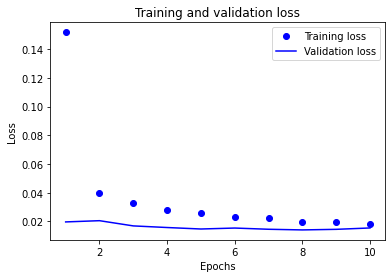

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
predictions1 = model.predict(X_test)
print(predictions1)
Get_score(predictions1, Y_test) 

[[0.8384767  0.7622064 ]
 [0.8388891  0.79507595]
 [0.84824336 0.7931835 ]
 ...
 [0.8293365  0.7202282 ]
 [0.81594646 0.69059396]
 [0.8155697  0.704761  ]]
The Spearman's correlation coefficient is: 0.314
The Spearman's correlation coefficient is: 0.130


 # 4.] 2. Using TFIDF Vectorize

In [0]:
tfidf=TfidfVectorizer(min_df=1, stop_words='english')

In [0]:
X_TF=tfidf.fit_transform(df_dev['Captions'])

In [0]:
#for test features
X_tfarrseq=X_TF.toarray()
X_tfarrseq

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
print(X_tfarrseq[0])

[0. 0. 0. ... 0. 0. 0.]


In [0]:
Y=df[['short-term_memorability','long-term_memorability']].values  #targets
X=X_tfarrseq #input

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [0]:
#For test set prediction purposes
Y_train = Y[0:6000]
X_train = X_tfarrseq[0:6000]
X_test = X_tfarrseq[6000:]

In [0]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('Y_train', Y_train.shape)
print('Y_test', Y_test.shape)

X_train (4800, 5123)
X_test (1200, 5123)
Y_train (4800, 2)
Y_test (1200, 2)


In [0]:
n_cols = X_train.shape[1]
n_cols

5123

In [0]:
# Set up the model: model and Save the number of columns in predictors: n_cols
model = Sequential()
# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
model.add(Dropout(0.5))
# Add the second layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
# Add the output layer
model.add(Dense(2))

In [0]:
# Compile the model
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [0]:
# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


In [0]:
# Fit the model
history=model.fit(X_train, Y_train, validation_split=0.3, epochs=30, callbacks= [early_stopping_monitor])

Train on 3360 samples, validate on 1440 samples
Epoch 1/30
3360/3360 [==============================] - 1s 250us/step - loss: 0.2819 - val_loss: 0.0284
Epoch 2/30
3360/3360 [==============================] - 1s 208us/step - loss: 0.0856 - val_loss: 0.0211
Epoch 3/30
3360/3360 [==============================] - 1s 204us/step - loss: 0.0724 - val_loss: 0.0217
Epoch 4/30
3360/3360 [==============================] - 1s 254us/step - loss: 0.0608 - val_loss: 0.0178
Epoch 5/30
3360/3360 [==============================] - 1s 227us/step - loss: 0.0521 - val_loss: 0.0177
Epoch 6/30
3360/3360 [==============================] - 1s 209us/step - loss: 0.0451 - val_loss: 0.0169
Epoch 7/30
3360/3360 [==============================] - 1s 203us/step - loss: 0.0382 - val_loss: 0.0173
Epoch 8/30
3360/3360 [==============================] - 1s 215us/step - loss: 0.0366 - val_loss: 0.0162
Epoch 9/30
3360/3360 [==============================] - 1s 205us/step - loss: 0.0325 - val_loss: 0.0148
Epoch 10/30
3360

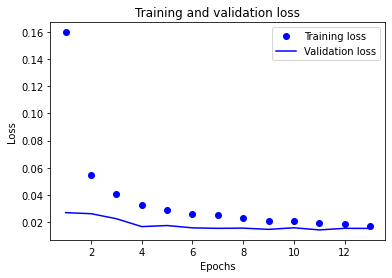

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
predictions2 = model.predict(X_test)
print(predictions2)
Get_score(predictions2, Y_test) # Try remember what the Spearman scores actually mean!

[[0.84516907 0.7724477 ]
 [0.8296598  0.76229405]
 [0.8297585  0.7524861 ]
 ...
 [0.83939326 0.7697942 ]
 [0.80512416 0.7310984 ]
 [0.797442   0.7201607 ]]
The Spearman's correlation coefficient is: 0.353
The Spearman's correlation coefficient is: 0.169


#4.] 3. IMAGE FEATURES

In [0]:
train_ground_truth.tail()

,video,short-term_memorability,long-term_memorability
5995,video7488.webm,0.921,1.000
5996,video7489.webm,0.909,0.839
5997,video7491.webm,0.713,0.818
5998,video7492.webm,0.954,1.000
5999,video7493.webm,0.953,0.615


In [0]:
test_ground_truth.tail()

,video,short-term_memorability,long-term_memorability
1995,10004,NaN,NaN
1996,10005,NaN,NaN
1997,10006,NaN,NaN
1998,10007,NaN,NaN
1999,10008,NaN,NaN


In [0]:
result_array = np.empty((0, 6075))
for line in df_dev['arrayInfo']:
    result_array = np.append(result_array, np.array([line]), axis = 0)

In [0]:
X_arrHMP = result_array
print(type(X_arrHMP))
X_arrHMP

<class 'numpy.ndarray'>


array([[1.25563e-01, 2.40360e-02, 3.14000e-04, ..., 8.60000e-05,
        5.80000e-04, 0.00000e+00],
       [7.52600e-03, 1.42100e-03, 6.80000e-05, ..., 2.20000e-04,
        7.62000e-04, 1.22400e-03],
       [1.09584e-01, 1.89780e-02, 2.89000e-04, ..., 5.20000e-05,
        2.58000e-04, 2.15000e-04],
       ...,
       [2.31390e-02, 7.43500e-03, 3.22000e-04, ..., 7.56000e-04,
        7.38000e-04, 2.14000e-04],
       [1.49000e-02, 4.60700e-03, 9.90000e-05, ..., 6.40000e-05,
        6.40000e-05, 1.10000e-05],
       [4.15920e-02, 1.30470e-02, 4.48000e-04, ..., 2.89000e-04,
        9.88000e-04, 1.61000e-04]])

In [0]:
Y=df_dev[['short-term_memorability','long-term_memorability']].values  #targets
X=X_arrHMP #input

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [0]:
#For test set prediction purposes
Y_train=train_ground_truth[['short-term_memorability','long-term_memorability']].values  #targets
Y_test=test_ground_truth[['short-term_memorability','long-term_memorability']].values  #targets
X=X_arrHMP #input
X_train = X[0:6000]
X_test = X[6000:]


In [0]:
#X_train, X_test = train_test_split(X, test_size=0.2, random_state=42) 

print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('Y_train', Y_train.shape)
print('Y_test', Y_test.shape)

X_train (6000, 6075)
X_test (0, 6075)
Y_train (6000, 2)
Y_test (2000, 2)


In [0]:
n_cols = X_train.shape[1]
n_cols

6075

In [0]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
model.add(Dropout(0.5))
# Add the second layer
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
# Add the output layer
model.add(Dense(2))

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
   
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

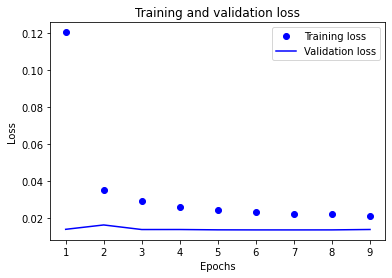

In [0]:
# Fit the model
#history=model.fit(X_train, Y_train, validation_split=0.3, epochs=30, callbacks= [early_stopping_monitor])
# Fit the model
#history=model.fit(X_train, Y_train, validation_split=0.3, epochs=30, callbacks= [early_stopping_monitor])
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
# Fit the model
history=model.fit(X_train, Y_train, validation_split=0.3, epochs=30, callbacks= [early_stopping_monitor])
# Fit the model
#history=model.fit(X_train, Y_train, validation_split=0.3, epochs=30, callbacks= [early_stopping_monitor])


Train on 4200 samples, validate on 1800 samples
Epoch 1/30
4200/4200 [==============================] - 2s 434us/step - loss: 0.1235 - accuracy: 0.6012 - val_loss: 0.0151 - val_accuracy: 0.7044
Epoch 2/30
4200/4200 [==============================] - 2s 395us/step - loss: 0.0364 - accuracy: 0.6148 - val_loss: 0.0149 - val_accuracy: 0.7044
Epoch 3/30
4200/4200 [==============================] - 2s 398us/step - loss: 0.0309 - accuracy: 0.6379 - val_loss: 0.0137 - val_accuracy: 0.7044
Epoch 4/30
4200/4200 [==============================] - 2s 397us/step - loss: 0.0268 - accuracy: 0.6379 - val_loss: 0.0136 - val_accuracy: 0.7044
Epoch 5/30
4200/4200 [==============================] - 2s 390us/step - loss: 0.0249 - accuracy: 0.6560 - val_loss: 0.0137 - val_accuracy: 0.7044
Epoch 6/30
4200/4200 [==============================] - 2s 400us/step - loss: 0.0236 - accuracy: 0.6760 - val_loss: 0.0140 - val_accuracy: 0.7044


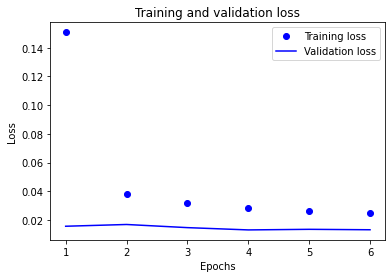

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
#test set predictions
predictions3_test = model.predict(X_test)
print(predictions3_test)
Get_score(predictions3_test, X_test)

[[0.8618469  0.7885598 ]
 [0.83826214 0.76315325]
 [0.86731255 0.7905973 ]
 ...
 [0.85938287 0.78235346]
 [0.85346794 0.7768066 ]
 [0.84871674 0.7745671 ]]
Input shapes don't match!


In [0]:
predictions_test = np.divide(predictions_test, 2)

In [0]:
predictions_test.shape

(2000, 2)

In [0]:
predictions_test[0:2000]

array([[0.79928935, 0.7025093 ],
       [0.80432814, 0.72336626],
       [0.8148873 , 0.72174054],
       ...,
       [0.8620664 , 0.7693423 ],
       [0.9066935 , 0.83314013],
       [0.82940066, 0.7409984 ]], dtype=float32)

In [0]:
Result = pd.read_csv('/content/drive/My Drive/Features/FinalResults.csv')

In [12]:
Result.shape

(0, 3)